In [2]:
!pip install PyPDF2
import PyPDF2
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3


In [20]:
filename = 'C:/Users/palad/mlspark/Files/Middlesex/BRADY_DISCLOSURES.pdf'
open_filename = open(filename, 'rb')

ind_manifesto = PyPDF2.PdfFileReader(open_filename)

In [21]:
ind_manifesto.getDocumentInfo()

{'/CreationDate': 'D:20220531114812',
 '/Creator': 'PDFium',
 '/Producer': 'PDFium'}

In [22]:
total_pages = ind_manifesto.numPages
total_pages

342

In [23]:
!pip install textract

  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3966 sha256=f2b7778261e951902b7387f37833b9b6c4e5b92d42f7705128e94f7d076b499f
  Stored in directory: c:\users\palad\appdata\local\pip\cache\wheels\55\f0\2c\81637d42670985178b77df6d41b9b6c6dc18c94818447414b9
  Created wheel for compressed-rtf: filename=compressed_rtf-1.0.6-py3-none-any.whl size=6209 sha256=b6c95df6cae6c03ae56534827ca03b922adf06ab3afde85efba6cd45f20b7beb
  Stored in directory: c:\users\palad\appdata\local\pip\cache\wheels\11\f5\c4\81acab65ab073b5a3e67fd82e4b9accf3dbcf1de39c7b246ec
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=471172 sha256=d01eb5588a75980ef284ae04e7ee778e36e8f0af85a85ed62885a912c0389fdf
  Stored in directory: c:\users\palad\appdata\local\pip\cache\wheels\b0\38\58\8530ed1681bfee42349acf166867cc9fb369517b2fce83e599
Successfully built docx2txt compressed-rtf python-pptx
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Unin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.


In [24]:
import textract

In [25]:
count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < total_pages):
    # Get the specified number of pages in the document
    mani_page  = ind_manifesto.getPage(count)
    # Process the next page
    count += 1
    # Extract the text from the page
    text += mani_page.extractText()

In [26]:
if text != '':
    text = text
    
else:
    textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' )    

In [27]:
!pip install autocorrect

  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=c9076a139fdd0b220c240509061ba4886a03ce8abcaa3bab1046a457ba252617
  Stored in directory: c:\users\palad\appdata\local\pip\cache\wheels\72\b8\3b\a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


In [28]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize


def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(text)
print(lower_case)

commonwealth of massachusetts middlesex , ss . ____________court docket no . ___________ commonwealth v. ________________________________________________________________________ commonwealth ’ s notice regarding a potential commonwealth witness ________________________________________________________________________ now comes the commonwealth , and in light of mass . r. crim . p. 14 and case law , including matter of grand jury investigation , 485 mass . 641 ( 2020 ) , hereby notifies the defendant that one of the potential witnesses in this case , dracut police officer todd allard , was the subject of an internal affairs investigation stemming from various shortcomings in his response to a request for mutual aid concerning an intoxicated operator of a motor vehicle on february 12 , 2020 . the investigation sustained multiple violations of internal rules and regulations of the dracut police department , specifically neglect of duty , attention to duty , conduct unbecoming an officer an

In [29]:
import pandas as pd

In [31]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [32]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [37]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

# lets print out the output from our function above and see how the data looks like
clean_data = ' '.join(lemmatized_word)
print(clean_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\palad\AppData\Roaming\nltk_data...


commonwealth massachusetts middlesex s ____________court docket ___________ commonwealth ________________________________________________________________________ commonwealth notice regarding potential commonwealth witness ________________________________________________________________________ come commonwealth light mass crim case law including matter grand jury investigation mass hereby notifies defendant one potential witness case dracut police officer todd allard subject internal affair investigation stemming various shortcoming response request mutual aid concerning intoxicated operator motor vehicle february investigation sustained multiple violation internal rule regulation dracut police department specifically neglect duty attention duty conduct unbecoming officer multiple finding untruthfulness course internal affair investigation commonwealth recognizes within court discretion decide whether officer credibility critical issue trial whether prior false statement unconnected m

In [38]:
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['Itula']
df

,script
Itula,commonwealth massachusetts middlesex s _______...


In [39]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [40]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

,__,___,____,______,_______,_________,__________,___________,____________,_____________,...,zesolved,zetrieved,zeturn,zeyuest,zi,zip,zn,znobions,zveze,zzghts
Itula,6,3,3,5,1,2,3,121,3,19,...,1,1,1,1,1,1,2,1,1,1


In [41]:
data = data_vect_feat.transpose()
data

,Itula
__,6
___,3
____,3
______,5
_______,1
...,...
zip,1
zn,2
znobions,1
zveze,1


In [42]:
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 1000 words written in the manifesto
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))
    

key Itula, value [('commonwealth', 1623), ('mass', 785), ('officer', 645), ('witness', 613), ('case', 517), ('police', 501), ('district', 488), ('investigation', 469), ('attorney', 396), ('massachusetts', 326), ('evidence', 306), ('credibility', 296), ('potential', 282), ('________________________________________________________________________', 280), ('matter', 255), ('including', 247), ('department', 243), ('misconduct', 231), ('middlesex', 229), ('docket', 223), ('prior', 222), ('regarding', 222), ('court', 220), ('untruthfulness', 219), ('act', 217), ('admissible', 211), ('impeachment', 210), ('defendant', 207), ('date', 199), ('trial', 197), ('report', 195), ('notice', 194), ('internal', 194), ('law', 189), ('rule', 185), ('submitted', 182), ('come', 177), ('assistant', 174), ('information', 173), ('crim', 172), ('respectfully', 171), ('marian', 171), ('ryan', 171), ('notifies', 169), ('testimony', 168), ('jury', 159), ('grand', 158), ('kiely', 144), ('ameral', 139), ('affair', 1

In [43]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 100 words for each comedian
words = []
for president in data:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)

print(words[:10])

['commonwealth', 'mass', 'officer', 'witness', 'case', 'police', 'district', 'investigation', 'attorney', 'massachusetts']


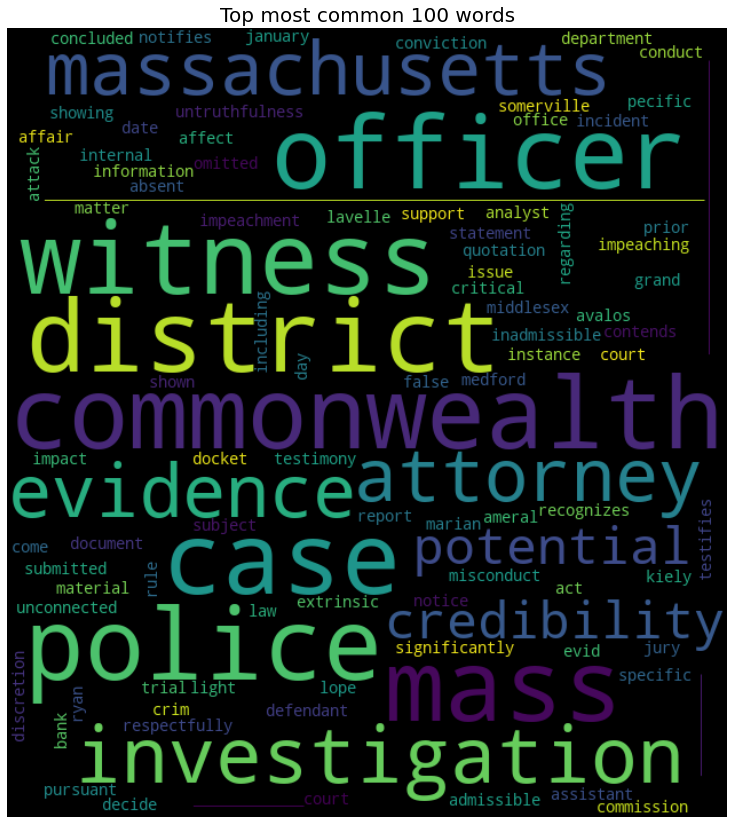

In [49]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk

# Image used in which our world cloud output will be
img1 = imageio.imread("C:/Users/palad/mlspark/Files/Middlesex/test.jpg")
hcmask1 = img1

# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('Brady_top_100.jpeg')

In [52]:
!pip install vaderSentiment
!pip install textblob

In [53]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [54]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.0855700717855036, subjectivity=0.45368504120211234)

In [55]:
# Importing all the necessary libraries
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [56]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
# One out of 5 words differ => 0.8 similarity
print(sentence_similarity("This is a good sentence".split(), "This is a bad sentence".split()))
 
# One out of 2 non-stop words differ => 0.5 similarity
print(sentence_similarity("This is a good sentence".split(), "This is a bad sentence".split(), stopwords.words('english')))
 
# 0 out of 2 non-stop words differ => 1 similarity (identical sentences)
print(sentence_similarity("This is a good sentence".split(), "This is a good sentence".split(), stopwords.words('english')))
 
# Completely different sentences=> 0.0
print(sentence_similarity("This is a good sentence".split(), "I want to go to the market".split(), stopwords.words('english')))

0.7999999999999998
0.4999999999999999
0.9999999999999998
0.0


In [57]:
#print(sentences)

# get the english list of stopwords
#stop_words = stopwords.words('english')
 
def build_similarity_matrix(lower_case, stopwords=None):
    # Create an empty similarity matrix
    S = np.zeros([len(lower_case), len(lower_case)])
 
 
    for idx1 in range(len(lower_case)):
        for idx2 in range(len(lower_case)):
            if idx1 == idx2:
                continue
 
            S[idx1][idx2] = sentence_similarity(lower_case[idx1], lower_case[idx2], stop_words)
 
    # normalize the matrix row-wise
    for idx in range(len(S)):
        S[idx] /= S[idx].sum()
 
    return S

In [58]:
#len(sentences)
#S = build_similarity_matrix(sentences, stop_words)    
#S

In [59]:
def generate_summary(lower_case, top_n=5):
    # Remove all the stopwords in the document
    stop_words = stopwords.words('english')
    summarize_text = []
    
    
    
    #Read text and tokenize
    #lower_case  = nltk.word_tokenize(lower_case)
    
   
    
    #Generate similarity matrix across sentences
    sentence_similarity  = build_similarity_matrix((lower_case, stop_words))
    
    #Rank sentences in similarity matrix
    sentence_similiraty_graph = nx.from_numpy_array(sentence_similarity)
    scores = nx.pagerank(sentence_similiraty_graph)
    
    
    #Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(lower_case)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence) 
    
    for i in range(top_n):
        summarize_text.append(' '.join(ranked_sentence[i][1]))
        
    #Output the summarized text
    print('Summarized Text: \n', '. '.join(summarize_text))
       

In [66]:
!pip install gensim==3.4.0
from gensim.summarization.summarizer import summarize

  Created wheel for gensim: filename=gensim-3.4.0-cp38-cp38-win_amd64.whl size=22293577 sha256=5602d6ed28ba5b79ba35d88ff6ac56d42dd4998e5b7799e7ca6a8ba355b3c112
  Stored in directory: c:\users\palad\appdata\local\pip\cache\wheels\b4\a4\71\a301cdb2b7d5d31525936fcb8dcd9a5f144578d047407f7cf9
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3


In [71]:
# Print out our summarized text of the document which was converted to lower case, remember we could have opted to remove stopwords as well.

summary=summarize(lower_case, word_count=50)

TypeError: object of type 'Graph' has no len()

In [74]:
# Gensim
!pip install pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
#import graphlab as gl
#import pyLDAvis.graphlab
import pyLDAvis.gensim_models as gensimvis

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
data  = []
data.append(clean_text(lower_case))

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
# This time we use spacy for lemmatizarion 
!pip install spacy
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm
!python -m spacy download en
import spacy

# Second lemmatization of our data
def lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_output = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        texts_output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_output

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatize keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


C:\Users\palad\anaconda3\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [83]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 36), (6, 2), (7, 1), (8, 104), (9, 2), (10, 10), (11, 3), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 7), (19, 4), (20, 3), (21, 3), (22, 10), (23, 4), (24, 9), (25, 11), (26, 3), (27, 1), (28, 2), (29, 1), (30, 1), (31, 4), (32, 1), (33, 2), (34, 117), (35, 1), (36, 21), (37, 1), (38, 1), (39, 1), (40, 3), (41, 3), (42, 2), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 7), (49, 22), (50, 11), (51, 1), (52, 2), (53, 4), (54, 1), (55, 1), (56, 22), (57, 31), (58, 1), (59, 211), (60, 11), (61, 12), (62, 2), (63, 24), (64, 27), (65, 104), (66, 1), (67, 2), (68, 1), (69, 1), (70, 4), (71, 2), (72, 1), (73, 2), (74, 1), (75, 2), (76, 1), (77, 1), (78, 6), (79, 1), (80, 6), (81, 2), (82, 1), (83, 1), (84, 9), (85, 1), (86, 1), (87, 1), (88, 1), (89, 28), (90, 14), (91, 2), (92, 2), (93, 1), (94, 6), (95, 3), (96, 2), (97, 70), (98, 2), (99, 84), (100, 2), (101, 1), (102, 10), (103, 1), (104, 1), (105, 17), (106, 93), (107, 1), 

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, alpha='auto', num_topics=20, random_state=100,
                                           update_every=1, passes=20, per_word_topics=True)

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# Lets view the topics in our model
print(lda_model.print_topics())
doc_lda  = lda_model[corpus]

[(0, '0.001*"officer" + 0.001*"witness" + 0.001*"commonwealth" + 0.001*"case" + 0.000*"attorney" + 0.000*"investigation" + 0.000*"district" + 0.000*"potential" + 0.000*"court" + 0.000*"misconduct"'), (1, '0.000*"commonwealth" + 0.000*"witness" + 0.000*"officer" + 0.000*"attorney" + 0.000*"investigation" + 0.000*"case" + 0.000*"district" + 0.000*"evidence" + 0.000*"include" + 0.000*"matter"'), (2, '0.001*"commonwealth" + 0.001*"officer" + 0.001*"witness" + 0.001*"case" + 0.001*"investigation" + 0.001*"attorney" + 0.001*"evidence" + 0.000*"potential" + 0.000*"district" + 0.000*"credibility"'), (3, '0.000*"witness" + 0.000*"officer" + 0.000*"case" + 0.000*"commonwealth" + 0.000*"investigation" + 0.000*"attorney" + 0.000*"district" + 0.000*"evidence" + 0.000*"court" + 0.000*"include"'), (4, '0.001*"commonwealth" + 0.001*"officer" + 0.001*"investigation" + 0.001*"case" + 0.000*"witness" + 0.000*"attorney" + 0.000*"credibility" + 0.000*"district" + 0.000*"evidence" + 0.000*"include"'), (5, '

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
# Print model perplexity
print('\nPerplexity:', lda_model.log_perplexity(corpus))


# Coherence Score

coherence_model_lda = CoherenceModel(lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity: -6.343280187308148
Coherence Score: 0.747784250312932


In [94]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
lda_viz

C:\Users\palad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
10    -0.278009  0.0       1        1  99.999097
16    -0.002788 -0.0       2        1   0.000056
7      0.015100 -0.0       3        1   0.000050
2      0.015031 -0.0       4        1   0.000050
14     0.014546 -0.0       5        1   0.000050
18     0.014130 -0.0       6        1   0.000050
8      0.014073 -0.0       7        1   0.000049
15     0.013177 -0.0       8        1   0.000049
13     0.004270  0.0       9        1   0.000046
5      0.018578  0.0      10        1   0.000046
6      0.018471  0.0      11        1   0.000046
1      0.018122  0.0      12        1   0.000046
3      0.017844  0.0      13        1   0.000046
12     0.017690 -0.0      14        1   0.000046
11     0.017663 -0.0      15        1   0.000046
19     0.017001  0.0      16        1   0.000046
0      0.016651  0.0      17        1   0.000046
9      0.016442 -0.0      18        1   0.000046
4      0.016092  0.0      19        1   0.000046
17     0.015916 -0.0      20        1   0.000046, topic_info=               Term        Freq       Total Category  logprob  loglift
394    commonwealth  672.000000  672.000000  Default  30.0000  30.0000
2345        witness  608.000000  608.000000  Default  29.0000  29.0000
1442        officer  611.000000  611.000000  Default  28.0000  28.0000
302            case  512.000000  512.000000  Default  27.0000  27.0000
1124  investigation  446.000000  446.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
533            date    0.000006  225.150345  Topic20  -7.6889  -2.9194
2116      testimony    0.000006  167.376653  Topic20  -7.6930  -2.6270
1026    impeachment    0.000006  209.194030  Topic20  -7.6909  -2.8480
1200            law    0.000006  186.294509  Topic20  -7.6925  -2.7336
1787         report    0.000006  192.266069  Topic20  -7.6927  -2.7654

[1683 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1         1  0.960946         aanduct
4         1  0.961152           abide
15        1  0.961167        accepted
17        1  0.961299       accompany
30        1  0.961055  ackaowxedgment
...     ...       ...             ...
2361      1  0.961288            yell
2362      1  0.964738             yet
2365      1  0.961879             yon
2369      1  0.961161        zetrieve
2370      1  0.961531          zeturn

[460 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 17, 8, 3, 15, 19, 9, 16, 14, 6, 7, 2, 4, 13, 12, 20, 1, 10, 5, 18])